In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pymysql
import time
import urllib
from bs4 import BeautifulSoup

colors = np.random.rand(50)
sea.set_style('dark')
# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [2]:
db = pymysql.connect(host="localhost", # your host, usually localhost
                     user="root", # your username
                      passwd="850718", # your password
                      db="oscar", use_unicode=True, charset="utf8") # name of the data base
cur = db.cursor()

In [13]:
cur.execute("SELECT authorID, cnt FROM reviewer_detail order by cnt desc limit 15")
row1 =  cur.fetchall()
review_authorID = []
review_authorNum = []
#genre
for row in row1:
	review_authorID.append("user"+row[0])
#count
for row in row1:
	review_authorNum.append(int(row[1]))

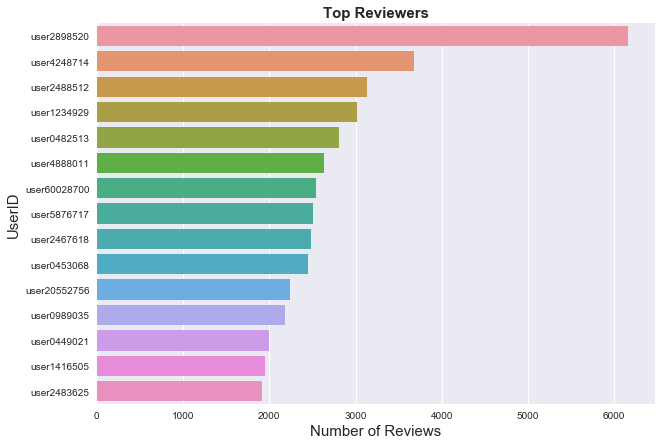

In [18]:
fig11 = plt.figure()
plt.title('Top Reviewers', fontsize=15, fontweight="bold")
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('UserID', fontsize=15)
review_authorID = np.asarray(review_authorID)
review_authorNum = np.asarray(review_authorNum)
plt.grid(True)
g_author_num = sea.barplot(review_authorNum, review_authorID)
plt.savefig('Top Reviewers.pdf', format='pdf', bbox_inches='tight')

In [15]:
cur.execute("select place, count(place) as cnt from reviewer_detail  where place!=' ' and place!='NULL'  group by place order by cnt desc limit 15")
row2 =  cur.fetchall()
reviewer_place = []
reviewer_placeNum = []
#genre
for row in row2:
	reviewer_place.append(row[0])
#count
for row in row2:
	reviewer_placeNum.append(int(row[1]))

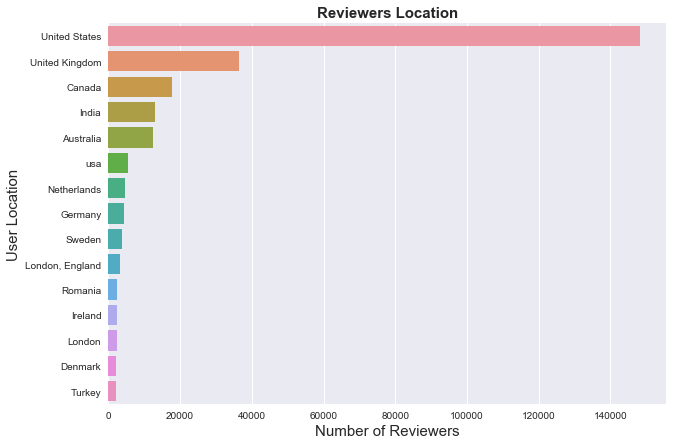

In [19]:
fig2 = plt.figure()
plt.title('Reviewers Location', fontsize=15, fontweight="bold")
plt.xlabel('Number of Reviewers', fontsize=15)
plt.ylabel('User Location', fontsize=15)
reviewer_place = np.asarray(reviewer_place)
reviewer_placeNum = np.asarray(reviewer_placeNum)
plt.grid(True)
g_place_num = sea.barplot(reviewer_placeNum, reviewer_place)
plt.savefig('Review location.pdf', format='pdf', bbox_inches='tight')


In [16]:
cur.execute("select reviewersMovieRating, count(reviewersMovieRating) as cnt from top10000_reviews_all  group by reviewersMovieRating ")
row3 =  cur.fetchall()
review_rating = []
reviewer_ratingNum = []
#genre
for row in row3:
	review_rating.append(int(row[0]))
#count
for row in row3:
	reviewer_ratingNum.append(int(row[1]))

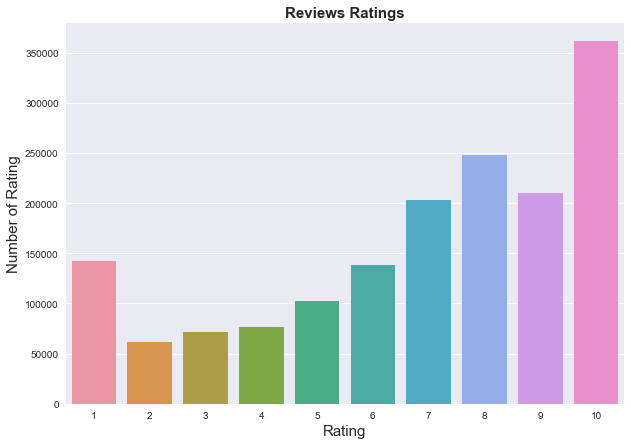

In [4]:
fig3 = plt.figure()
plt.title('Reviews Ratings', fontsize=15, fontweight="bold")
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Number of Rating', fontsize=15)
plt.grid(True)
review_rating = np.asarray(review_rating)
reviewer_ratingNum = np.asarray(reviewer_ratingNum)
g_rating_num = sea.barplot(review_rating, reviewer_ratingNum)
plt.savefig('Review Ratings.pdf', format='pdf', bbox_inches='tight')



In [5]:
cur.execute("select dateOfReview, count(dateOfReview) as cnt from top10000_reviews_all  group by dateOfReview  ")
row4 =  cur.fetchall()
review_year = []
review_yearNum = []
#genre
for row in row4:
	review_year.append(int(row[0]))
#count
for row in row4:
	review_yearNum.append(int(row[1]))

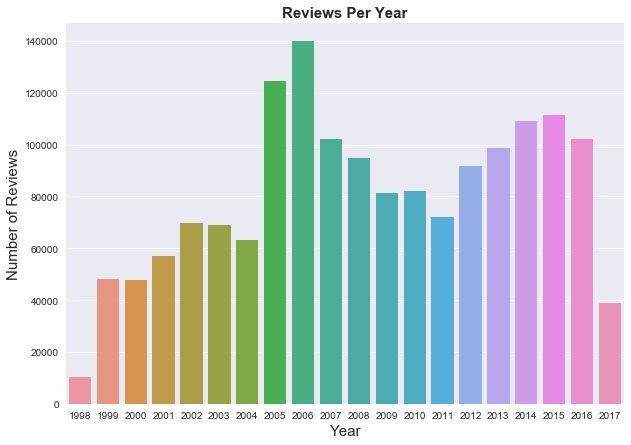

In [6]:
fig4 = plt.figure()
plt.title('Reviews Per Year', fontsize=15, fontweight="bold")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.grid(True)
review_year = np.asarray(review_year)
review_yearNum = np.asarray(review_yearNum)
g_year_num = sea.barplot(review_year, review_yearNum)
plt.savefig('Review By Year.pdf', format='pdf', bbox_inches='tight')

In [7]:
cur.execute("select movieName, count(movieName) as cnt from top10000_reviews_all  group by movieName order by cnt desc limit 30   ")
row6 =  cur.fetchall()
review_movie = []
review_movieNum = []
#genre
for row in row6:
	review_movie.append(row[0])
#count
for row in row6:
	review_movieNum.append(int(row[1]))

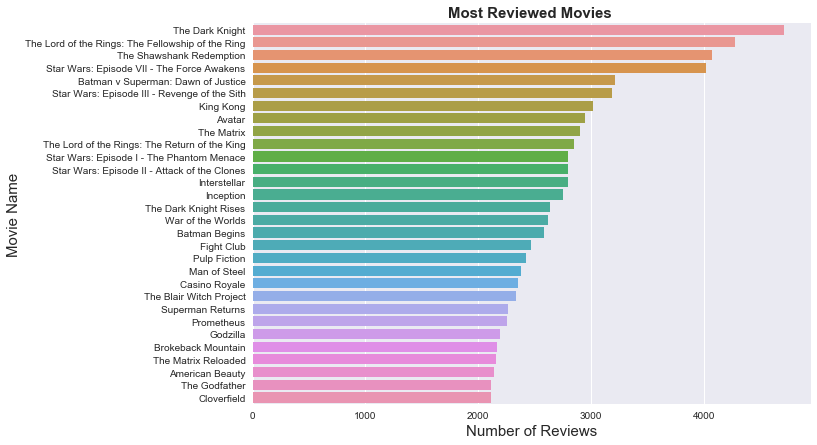

In [8]:
fig5 = plt.figure()
plt.title('Most Reviewed Movies ', fontsize=15, fontweight="bold")
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('Movie Name', fontsize=15)
plt.grid(True)
review_movie = np.asarray(review_movie)
review_movieNum = np.asarray(review_movieNum)
g_movie_num = sea.barplot(review_movieNum, review_movie)
plt.savefig('Most Reviewed Movies .pdf', format='pdf', bbox_inches='tight')

In [4]:
cur.execute("select movieID, count(movieID) as movieCount, sum(sentiment) as sentimentSum, avg(rating) from submission group by movieID")
row7 =  cur.fetchall()
movie_sentiment_value = []
movie_avg_rating = []
#genre
for row in row7:
	movie_sentiment_value.append((row[2])/row[1])
	movie_avg_rating.append(row[3])

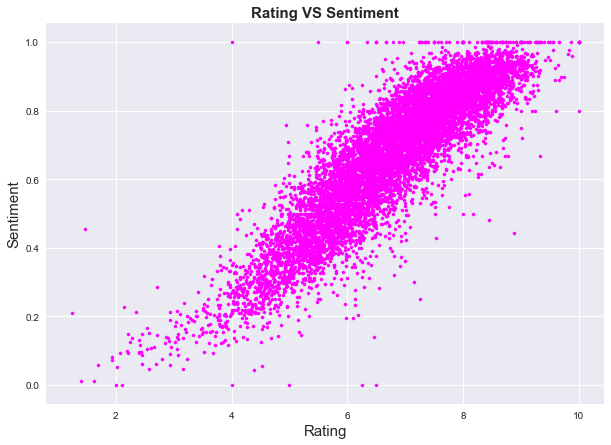

In [5]:
plt.title('Rating VS Sentiment', fontsize=15, fontweight="bold")
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Sentiment', fontsize=15)
movie_sentiment_value = np.asarray(movie_sentiment_value)
movie_avg_rating = np.asarray(movie_avg_rating)
plt.scatter(  movie_avg_rating, movie_sentiment_value , color='magenta', s=10)
plt.grid(True)
plt.savefig('Rating VS Sentiment.pdf', format='pdf')